In [1]:
import pandas as pd

In [2]:
!pip install openpyxl

In [3]:
df = pd.read_excel(r"moneycare.xlsx")
df

,time,review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...
...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...


In [4]:
from konlpy.tag import Okt
okt=Okt()

In [5]:
stopwords_df = pd.read_csv(r"ko-stopwords.csv")
stopwords_df

,stopwords
0,가
1,가까스로
2,가령
3,각
4,각각
...,...
600,진짜
601,두
602,게
603,요


In [6]:
stopwords = set(stopwords_df['stopwords']) #집합 변경
stopwords

{'가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 

In [7]:
'Noun', 'Adjective', 'Verb'

('Noun', 'Adjective', 'Verb')

In [8]:
def okt_pos_tagging(string) :
    pos_words = okt.pos(string, stem =True, norm=True)
    result = [word for word, tag in pos_words if word not in stopwords if tag in {'Noun', 'Verb'} ]
    return result

In [9]:
okt_pos_tagging(df['review'][0])

['가계부',
 '지출',
 '생활비',
 '정산',
 '만',
 '원',
 '가계부',
 '인',
 '가구',
 '자취',
 '생활비',
 '식비',
 '아끼다',
 '고정',
 '지출',
 '생활비',
 '아끼다',
 '무',
 '지출',
 '직장인',
 '짜다',
 '테크',
 '벌써',
 '가계부',
 '작성',
 '한지',
 '개월',
 '되어다',
 '생활비',
 '원',
 '생활비',
 '원',
 '생활비',
 '지난달',
 '대비',
 '원',
 '바',
 '가계부',
 '쓰다',
 '의미',
 '정도',
 '로비',
 '슷',
 '개월',
 '사실',
 '달',
 '초',
 '저녁',
 '약속',
 '시험',
 '원서',
 '접수',
 '비',
 '고양이',
 '용품',
 '돈',
 '써다',
 '버리다',
 '때문',
 '남다',
 '달',
 '쪼들리다',
 '사람',
 '이츠미',
 '달',
 '당근',
 '거래',
 '무려',
 '원',
 '벌다',
 '당근',
 '거래',
 '처음',
 '해보다',
 '떨리다',
 '애송이',
 '중고',
 '거래',
 '만렙',
 '되어다',
 '달',
 '생기다',
 '약속',
 '서예',
 '비용',
 '벗어나다',
 '힐링',
 '수',
 '지출',
 '보다',
 '고양이',
 '모래',
 '달',
 '만',
 '원',
 '들다',
 '줄',
 '모르다',
 '고양이',
 '간식',
 '밥',
 '장난감',
 '모래',
 '제일',
 '달',
 '타투',
 '안',
 '전월',
 '덜',
 '써다',
 '거',
 '말',
 '후회',
 '전혀',
 '이제',
 '가계부',
 '작성',
 '분석',
 '외식',
 '식비',
 '공부',
 '고양이',
 '약',
 '약속',
 '줄이다',
 '답',
 '물가',
 '후',
 '덜덜',
 '여름',
 '휴가',
 '제외',
 '공부',
 '열중',
 '터',
 '생활비',
 '만',
 '원',
 '목표',
 '보다',
 '파이팅']

데이터 프레임에 추가

In [10]:
df

,time,review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...
...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...


In [11]:
import pandas as pd
from tqdm.auto import tqdm

In [12]:
tqdm.pandas()

In [13]:
df['tagged_review'] = df['review'].progress_apply(lambda x : okt_pos_tagging(x))

  0%|          | 0/1019 [00:00<?, ?it/s]

In [14]:
df

,time,review,tagged_review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ..."
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ..."
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,..."
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,..."
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 폭우, ..."
...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 보다, 주, 밸런스, 프렌즈, 토글, 리더, 스, 영감, 주다, 쯔, 지언..."
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 탤, 공주, 넘다, 모든, ..."
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ..."
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 글, 사진, 레전드, 최대, 장수, 생, 시작, 먹다, 햄..."


벡터화

In [15]:
!pip show scipy

Name: scipy
Version: 1.13.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions
        are met:
        
        1. Redistributions of source code must retain the above copyright
           notice, this list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above
           copyright notice, this list of conditions and the following
           disclaimer in the documentation and/or other materials provided
           with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products derived

In [16]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [17]:
df

,time,review,tagged_review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ..."
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ..."
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,..."
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,..."
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 폭우, ..."
...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 보다, 주, 밸런스, 프렌즈, 토글, 리더, 스, 영감, 주다, 쯔, 지언..."
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 탤, 공주, 넘다, 모든, ..."
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ..."
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 글, 사진, 레전드, 최대, 장수, 생, 시작, 먹다, 햄..."


In [18]:
tagged_corpus_list = []

for n, i in enumerate(df['tagged_review']):
    tag = "document{}".format(n) # ID 만들기
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = i))

In [19]:
tagged_corpus_list[0]

TaggedDocument(words=['가계부', '지출', '생활비', '정산', '만', '원', '가계부', '인', '가구', '자취', '생활비', '식비', '아끼다', '고정', '지출', '생활비', '아끼다', '무', '지출', '직장인', '짜다', '테크', '벌써', '가계부', '작성', '한지', '개월', '되어다', '생활비', '원', '생활비', '원', '생활비', '지난달', '대비', '원', '바', '가계부', '쓰다', '의미', '정도', '로비', '슷', '개월', '사실', '달', '초', '저녁', '약속', '시험', '원서', '접수', '비', '고양이', '용품', '돈', '써다', '버리다', '때문', '남다', '달', '쪼들리다', '사람', '이츠미', '달', '당근', '거래', '무려', '원', '벌다', '당근', '거래', '처음', '해보다', '떨리다', '애송이', '중고', '거래', '만렙', '되어다', '달', '생기다', '약속', '서예', '비용', '벗어나다', '힐링', '수', '지출', '보다', '고양이', '모래', '달', '만', '원', '들다', '줄', '모르다', '고양이', '간식', '밥', '장난감', '모래', '제일', '달', '타투', '안', '전월', '덜', '써다', '거', '말', '후회', '전혀', '이제', '가계부', '작성', '분석', '외식', '식비', '공부', '고양이', '약', '약속', '줄이다', '답', '물가', '후', '덜덜', '여름', '휴가', '제외', '공부', '열중', '터', '생활비', '만', '원', '목표', '보다', '파이팅'], tags=['document0'])

In [20]:
model_doc2vec = Doc2Vec(vector_size = 200,
                        alpha = 0.025,
                        min_alpha = 0.01,
                        window = 3,
                        min_count = 1,
                        dm = 1
                       )

In [21]:
#단어사전 장착
model_doc2vec.build_vocab(tagged_corpus_list)

In [22]:
#학습
model_doc2vec.train(tagged_corpus_list, total_examples=model_doc2vec.corpus_count, epochs=100)

In [23]:
model_doc2vec.dv["document0"]

array([ 1.9714888 , -0.94778204, -1.0885867 ,  0.80204165,  1.5354124 ,
       -0.12029117, -1.9223182 ,  1.9724336 ,  0.83572364,  0.44349623,
       -0.3290292 ,  0.11669073, -0.9199778 ,  1.4455847 , -3.3848298 ,
        0.5769685 , -0.329627  , -2.2065146 , -0.7998721 ,  1.1213121 ,
        0.1578204 , -1.994753  , -2.9915793 , -0.12652041, -0.0595297 ,
       -1.289109  , -1.6182392 ,  0.13758682, -0.3413354 ,  0.591263  ,
       -1.0479609 ,  2.8006053 , -1.1265678 , -0.5320497 , -2.0298257 ,
        0.4718691 , -1.0406892 ,  1.9710343 ,  0.80901426, -0.7027869 ,
       -2.5474272 ,  1.0180132 ,  0.28146037, -0.32980874,  0.5458046 ,
        1.1313256 ,  0.6647818 ,  0.15584263,  0.23991044,  1.4111774 ,
       -0.39489108, -1.3878795 , -0.39883003, -1.3472195 , -2.0883052 ,
       -1.6637628 ,  1.6264718 , -0.5218902 , -1.0541546 , -0.93793935,
        0.23708071,  2.5386071 , -1.3229939 , -0.18242344, -0.56772363,
       -0.7079512 ,  1.2510719 ,  1.3803706 , -0.36067846,  1.12

In [24]:
vector_list = []
for i in range(len(df)) :
    doc2vec = model_doc2vec.dv["document{}".format(i)]
    vector_list.append(doc2vec)

In [25]:
df['vector'] = vector_list
df

,time,review,tagged_review,vector
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[1.9714888, -0.94778204, -1.0885867, 0.8020416..."
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[0.764122, -2.34187, 0.20729314, 0.30462116, 2..."
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[1.0665392, -0.572841, 0.8680041, -0.64153767,..."
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,...","[1.5281684, -2.497705, 0.10662862, -2.5143213,..."
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 폭우, ...","[2.0269754, -2.7090094, 2.547354, -1.2687029, ..."
...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 보다, 주, 밸런스, 프렌즈, 토글, 리더, 스, 영감, 주다, 쯔, 지언...","[1.1626765, 0.044002604, -1.9442306, -0.214128..."
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 탤, 공주, 넘다, 모든, ...","[1.43683, -1.0596482, -1.7138087, -3.7313468, ..."
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[-0.02148947, -3.018895, -1.3132687, -2.379692..."
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 글, 사진, 레전드, 최대, 장수, 생, 시작, 먹다, 햄...","[-0.6717768, -0.60019994, -0.73100406, -2.7225..."


병합 계층적 클러스터링

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

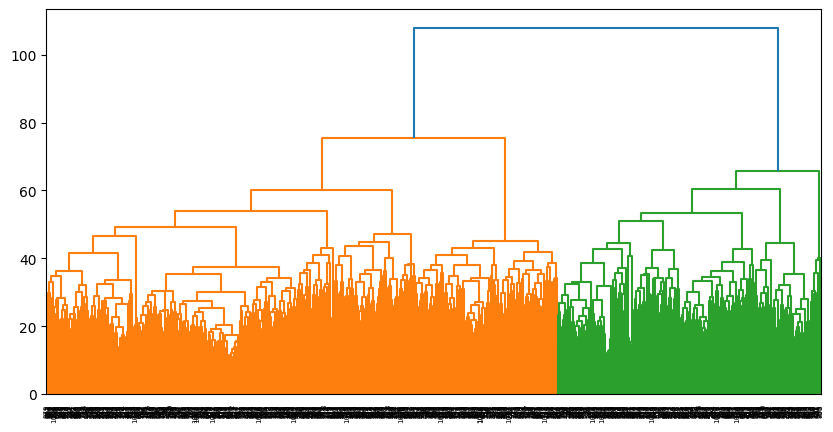

In [27]:
model_linkage = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(10,5))

dendrogram(model_linkage,
           orientation = 'top',
           distance_sort = 'descending',
           show_leaf_counts=False)
plt.show()

In [28]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [29]:
# 3개의 클러스터로 구분해 보기
cluster_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_label = cluster_model.fit_predict(list(df['vector']))
cluster_label

array([0, 1, 1, ..., 1, 2, 1], dtype=int64)

In [30]:
# 실루엣 지수 구하기
n_cluster = []
clustering_score = []

for i in tqdm(range(2,15)) :
    cluster_model = AgglomerativeClustering(n_clusters=i , linkage='ward')
    cluster_label = cluster_model.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_label)
    n_cluster.append(i)
    clustering_score.append(score)

  0%|          | 0/13 [00:00<?, ?it/s]

In [31]:
clustering_score

[0.016676440834999084,
 0.005110418424010277,
 0.0039004713762551546,
 -0.005506579764187336,
 -0.014313528314232826,
 -0.024421527981758118,
 -0.022930514067411423,
 -0.02882353775203228,
 -0.04635157063603401,
 -0.045623037964105606,
 -0.04463673755526543,
 -0.043753620237112045,
 -0.043063536286354065]

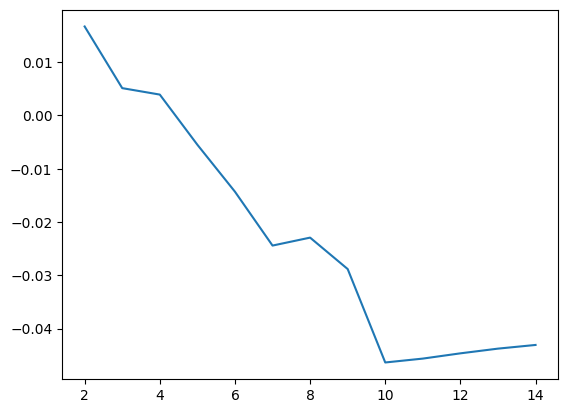

In [32]:
plt.plot(n_cluster, clustering_score)

In [33]:
result = pd.DataFrame({'n_cluster':n_cluster, 'score':clustering_score})
result

,n_cluster,score
0,2,0.016676
1,3,0.005110
2,4,0.003900
3,5,-0.005507
4,6,-0.014314
5,7,-0.024422
6,8,-0.022931
7,9,-0.028824
8,10,-0.046352
9,11,-0.045623


In [34]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_label = cluster_model.fit_predict(list(df['vector']))
cluster_label

array([0, 1, 1, ..., 1, 2, 1], dtype=int64)

In [35]:
df['cluster'] = cluster_label
df

,time,review,tagged_review,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[가계부, 지출, 생활비, 정산, 만, 원, 가계부, 인, 가구, 자취, 생활비, ...","[1.9714888, -0.94778204, -1.0885867, 0.8020416...",0
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[0.764122, -2.34187, 0.20729314, 0.30462116, 2...",1
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 경제, 흐름, 알다, 예금, 안정, 이자, 바라보다,...","[1.0665392, -0.572841, 0.8680041, -0.64153767,...",1
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 금리, 변동, 카카오, 뱅크,...","[1.5281684, -2.497705, 0.10662862, -2.5143213,...",1
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 폭우, ...","[2.0269754, -2.7090094, 2.547354, -1.2687029, ...",1
...,...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 보다, 주, 밸런스, 프렌즈, 토글, 리더, 스, 영감, 주다, 쯔, 지언...","[1.1626765, 0.044002604, -1.9442306, -0.214128...",0
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 탤, 공주, 넘다, 모든, ...","[1.43683, -1.0596482, -1.7138087, -3.7313468, ...",1
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[-0.02148947, -3.018895, -1.3132687, -2.379692...",1
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 글, 사진, 레전드, 최대, 장수, 생, 시작, 먹다, 햄...","[-0.6717768, -0.60019994, -0.73100406, -2.7225...",2


해석하기 TF-IDF

In [36]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
df['cluster'].unique()

array([0, 1, 2], dtype=int64)

In [38]:
all_document = []

for i in df['cluster'].unique() :
    print(i)
    pos_tagging = df[df['cluster'] == i]['tagged_review'] 

    document = ''
    for pos in pos_tagging :
        doc = ' '.join(pos) + ' '
        document += doc
    all_document.append(document)

0
1
2


In [39]:
all_document[0][:]

'가계부 지출 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 아끼다 고정 지출 생활비 아끼다 무 지출 직장인 짜다 테크 벌써 가계부 작성 한지 개월 되어다 생활비 원 생활비 원 생활비 지난달 대비 원 바 가계부 쓰다 의미 정도 로비 슷 개월 사실 달 초 저녁 약속 시험 원서 접수 비 고양이 용품 돈 써다 버리다 때문 남다 달 쪼들리다 사람 이츠미 달 당근 거래 무려 원 벌다 당근 거래 처음 해보다 떨리다 애송이 중고 거래 만렙 되어다 달 생기다 약속 서예 비용 벗어나다 힐링 수 지출 보다 고양이 모래 달 만 원 들다 줄 모르다 고양이 간식 밥 장난감 모래 제일 달 타투 안 전월 덜 써다 거 말 후회 전혀 이제 가계부 작성 분석 외식 식비 공부 고양이 약 약속 줄이다 답 물가 후 덜덜 여름 휴가 제외 공부 열중 터 생활비 만 원 목표 보다 파이팅 개월 간의 학년 학기 막 내리다 개 월간 정말 쉬 않다 달다 온 버프 받다 진 모르다 학점 전공 주 저녁 알바 이루다 노력 매일 쯤 잠들다 시 분 기상 시 도서관 출근 밤 쯤 퇴근 반복 되어다 점 학점 나오다 주일 운동 운동 내 공부 알바 때문 헬스장 갈다 매일 굽히다 개 근육 유지 노력 크게 몸 망가지다 건 머슬 메모리 통해 금방 수 이제 알바 지도 개월 지나다 학원 중학생 단어 본문 보다 시험 기간 번 빠지다 평균 수입 약 만원 정도 월급 받다 날 청년 희망 적금 이체 지금 삶 여유롭다 말 수 들어오다 돈 그대로 가버리다 적금 계좌 지금 만원 들다 보다 기분 만원 돼다 대학생 신분 고정 수입 올리다 학년 알바 병행 때문 학년 돈 모으다 생각 살이 투자 생각 때문 돈 모으다 투자 계획 대학동 기다 대학생 백만원 푼 돈 취업 개월 모으다 생각 않다 돈 모으다 보다 사람 모으다 백만원 천만원 이면 모으다 도 꽤 걸리다 생각 뒤 조그만 부동산 투자 해 보다 방학 부동산 관력 서적 권 읽다 예정 방학 공공기관 알바 서울시 대학생 알바 지원 결과 나오다 붙다 학기 개강 전 살 보고 다시 자다 써다 가계부 가계부 언박싱 

In [40]:
#TF-IDF 벡터라이저 선언
vectorizer = TfidfVectorizer()
# TF-IDF 메트릭스 핏
tfidf_matrix = vectorizer.fit_transform(all_document)

In [41]:
# 키워드도출
feature_name = vectorizer.get_feature_names_out()
feature_name

array(['가가', '가게', '가격', ..., '힛양', '힝구', '힝힝'], dtype=object)

In [42]:
# TF-IDF 값
tfidf_value = tfidf_matrix.toarray()

In [43]:
tfidf_df = pd.DataFrame(tfidf_value, columns = feature_name)
tfidf_df

,가가,가게,가격,가격표,가계,가계부,가계약,가고일,가공,가관,...,힐웬,힘껏,힘내다,힘내쟈,힘쓰다,힘주다,힘줄,힛양,힝구,힝힝
0,0.001630,0.005544,0.014022,0.000326,0.005039,0.132721,0.000000,0.000000,0.00042,0.000000,...,0.000000,0.000552,0.001630,0.000000,0.000552,0.000420,0.000552,0.000000,0.000000,0.000000
1,0.002257,0.009028,0.021724,0.000846,0.001090,0.039780,0.000478,0.000478,0.00109,0.000478,...,0.000478,0.000000,0.003386,0.000478,0.000000,0.000000,0.000000,0.000000,0.000955,0.000000
2,0.000477,0.007148,0.010008,0.000477,0.000000,0.013344,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.003813,0.000000,0.000000,0.001227,0.000000,0.000807,0.000000,0.000807


In [44]:
tfidf_df.index = df['cluster'].unique()
tfidf_df

,가가,가게,가격,가격표,가계,가계부,가계약,가고일,가공,가관,...,힐웬,힘껏,힘내다,힘내쟈,힘쓰다,힘주다,힘줄,힛양,힝구,힝힝
0,0.001630,0.005544,0.014022,0.000326,0.005039,0.132721,0.000000,0.000000,0.00042,0.000000,...,0.000000,0.000552,0.001630,0.000000,0.000552,0.000420,0.000552,0.000000,0.000000,0.000000
1,0.002257,0.009028,0.021724,0.000846,0.001090,0.039780,0.000478,0.000478,0.00109,0.000478,...,0.000478,0.000000,0.003386,0.000478,0.000000,0.000000,0.000000,0.000000,0.000955,0.000000
2,0.000477,0.007148,0.010008,0.000477,0.000000,0.013344,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.003813,0.000000,0.000000,0.001227,0.000000,0.000807,0.000000,0.000807


In [45]:
tfidf_df_T = tfidf_df.T
tfidf_df_T

,0,1,2
가가,0.001630,0.002257,0.000477
가게,0.005544,0.009028,0.007148
가격,0.014022,0.021724,0.010008
가격표,0.000326,0.000846,0.000477
가계,0.005039,0.001090,0.000000
...,...,...,...
힘주다,0.000420,0.000000,0.001227
힘줄,0.000552,0.000000,0.000000
힛양,0.000000,0.000000,0.000807
힝구,0.000000,0.000955,0.000000


In [46]:
for i in tfidf_df_T.columns :
    #점수 정렬
    tfidfvalue = tfidf_df_T[i].sort_values(ascending=False)
    #데이터 프레임으로 변환
    data = {'tfidf_word': tfidfvalue.index, 'tfidf': tfidfvalue.values}
    data_df = pd.DataFrame(data)
    data_df.to_csv(f'cluster{i}_tf_idf.csv', encoding='utf-8-sig')

In [47]:
import pickle

with open('clustering_result.pkl', 'wb') as f:
    pickle.dump(df, f)